In [10]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import ExampleGraphs


In [11]:
# Solve for pressures of nodes
#N = 10
# Diameters of edges
#D = np.ones((N,N))
## Lengths of edges
#L = np.zeros((N,N))
#
# randomized edge initial lengths
#for i in range(N):
#    for j in range(i,N):
#        
#        if(i == j):
#            # not used anyway. Make 1 to allow division
#            L[i][j] = 1
#            D[i][j] = 0
#        else:
#            L[i][j] = L[j][i] = np.random.rand()
## No direct path from src to sink
#D[0][N-1] = D[N-1][0] = 0
#


#graph_params = ExampleGraphs.TakagakiMaze()
graph_params = ExampleGraphs.exampleMaze0()

D = graph_params['D']
L = graph_params['L']
pos = graph_params['pos']

graph = nx.from_numpy_matrix(D)
#pos = nx.spring_layout(graph)


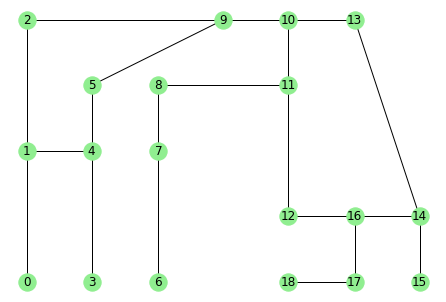

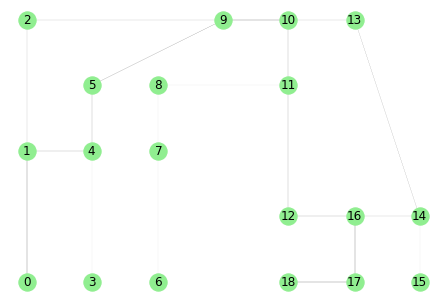

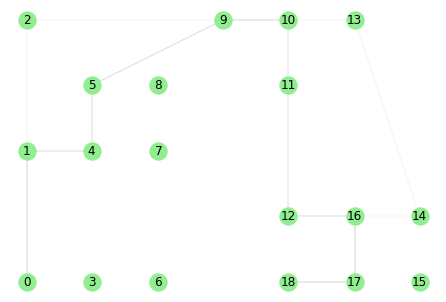

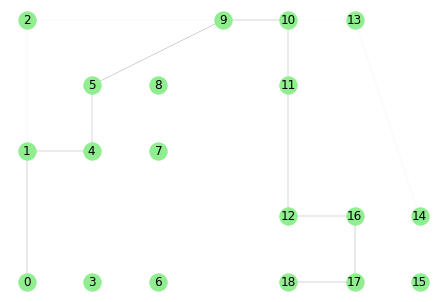

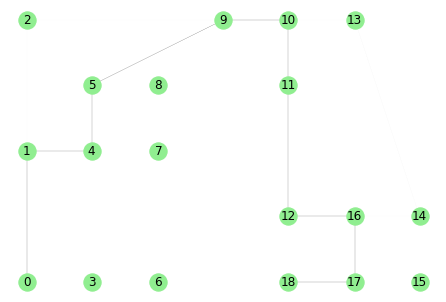

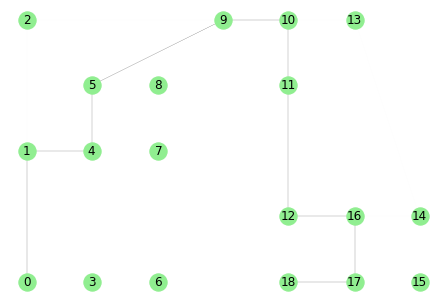

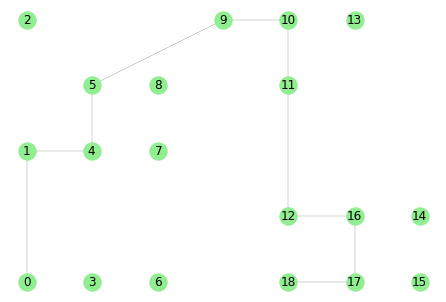

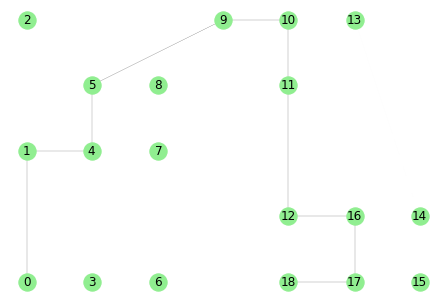

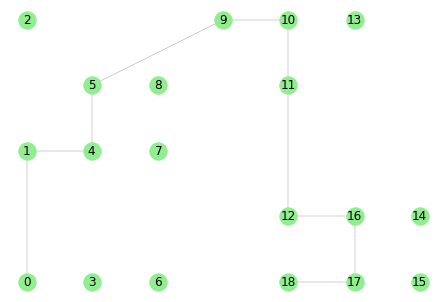

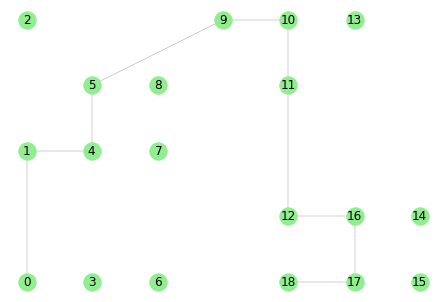

In [12]:

N = len(L)
src = 0
sink = 8

for rounds in range(50):
    
    
    if(rounds % 5 == 0):
        # Update nx graph edges for visualization
        for i in range(N):
            for j in range(i, N):
                if(D[i][j] != 0):
                    graph[i][j]['weight'] = D[i][j]
        weights = [graph[u][v]['weight'] for u,v in graph.edges()]

        plt.figure()
        nx.draw(graph, pos, 
                width=list(weights)*10,
                with_labels=True,
                node_color='lightgreen')
    
    # sum of currents leaving each node using KCL
    sums = np.zeros(N)
    sums[src] = 1
    sums[sink] = -1

    # Conductance of edges = D / L
    cond = np.divide(D,L)

    # Solve for node pressures 

    A = - np.copy(cond)

    for i in range(N):
        A[i][i] = np.sum(cond[i]) - cond[i][i]

    # Pressure of sink node is 0
    A[:, N-1] = 0

    A_inv = np.linalg.pinv(A)

    press = np.matmul(A_inv,sums)
    #print("Pressures: " + str(press))

    # Update diameters using slime mold algorithm

    # difference in pressure between nodes
    dP = np.zeros((N,N))
    for i in range(N):
        for j in range(i, N):
            dP[i][j] = press[i] - press[j]
            dP[j][i] = - dP[i][j]

    #print("dP:" + str(dP))

    # Flow through each edge
    Q = cond * dP

    # Update diameters
    D = 0.5*( (Q*dP / (L*press[0])) + D)
    
    
    